# Tu primer random forest con scikit-learn

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [8]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv('../data/pima-indians-diabetes.csv', sep=',')

In [ ]:
Pregnancies


148
Glucose


72
BloodPressure


35
SkinThickness


0
Insulin


33.6
BMI


0.627
DiabetesPedigreeFunction


50
Age


1
Class

## Exploración de datos

In [10]:
#Visualizacion del dataframe
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
156,1,109,56,21,135,25.2,0.833,23,0
611,7,168,88,42,321,38.2,0.787,40,1
678,2,101,58,17,265,24.2,0.614,23,0
6,10,115,0,0,0,35.3,0.134,29,0
597,1,173,74,0,0,36.8,0.088,38,1
378,0,93,100,39,72,43.4,1.021,35,0
316,3,182,74,0,0,30.5,0.345,29,1
68,4,146,85,27,100,28.9,0.189,27,0
525,1,97,64,19,82,18.2,0.299,21,0
529,2,122,60,18,106,29.8,0.717,22,0


In [11]:
#Renombramos las columnas
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [12]:
#Verificacion de datos
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [13]:
#Analizamos el shape del objeto
print(df_diabetes.shape)

(767, 9)


In [14]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [17]:
#Separamos en X e y
X = df_diabetes.drop('9. Class variable (0 or 1)', axis=1)
y = df_diabetes['9. Class variable (0 or 1)']

In [18]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split 
#30% para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)


In [19]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [20]:
#Entrenamiento
random_forest.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [22]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)

El accuracy en train es:  0.9850746268656716
El accuracy en test es:  0.7445887445887446


In [23]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending=False)
# Mostrar
feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


C:\Users\celio\AppData\Local\Temp\ipykernel_13688\1978532077.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


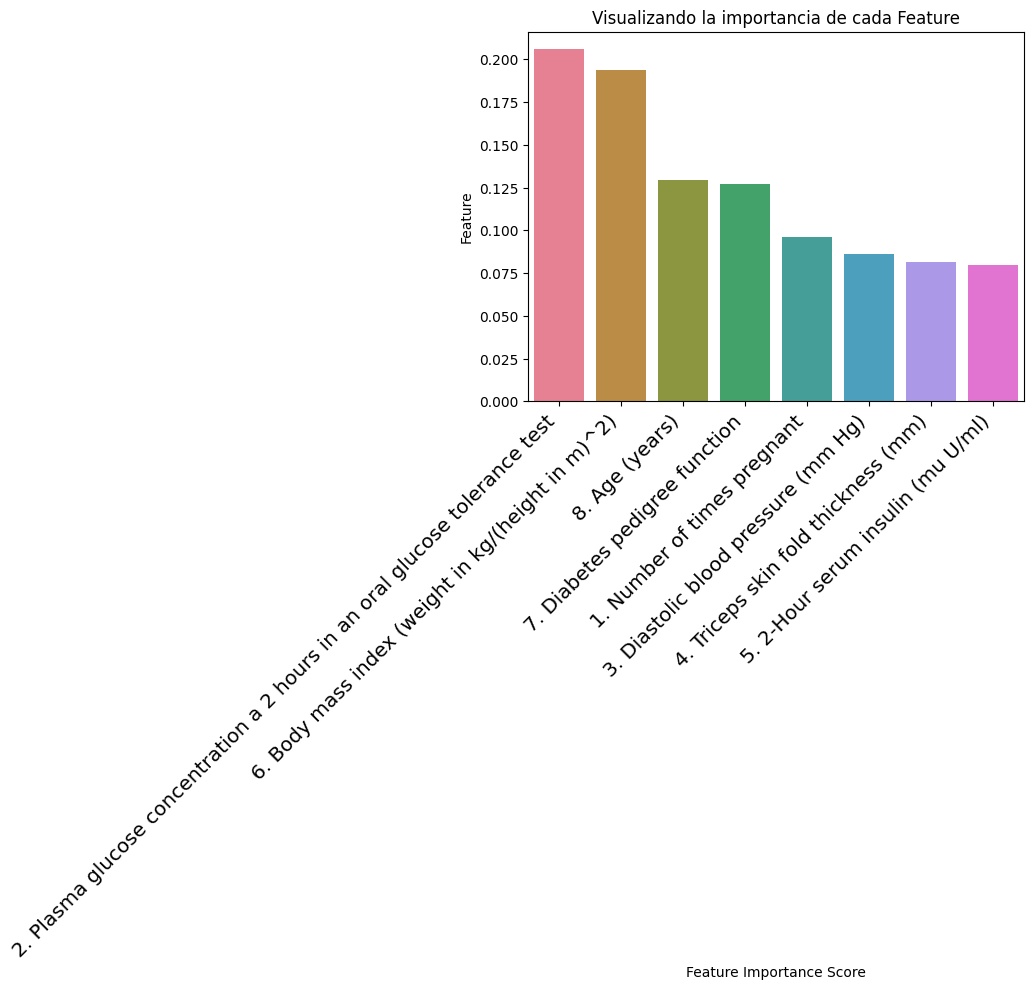

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette("husl", len(feature_importances_df))  # o cualquier otro palette

sns.barplot(
    x="feature",
    y="importance",
    hue="feature", 
    data=feature_importances_df,
    palette=colors
)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.tight_layout()
plt.show()


**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**